# Part 2, Q2a, What are the best times and days to minimise delays each year?

## **Reading in relevant files**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df_2004 = pd.read_csv ('2004.csv.bz2')
df_2005 = pd.read_csv ('2005.csv.bz2')
df_2006 = pd.read_csv ('2006.csv.bz2')
df_2007 = pd.read_csv ('2007.csv.bz2')
df_2008 = pd.read_csv ('2008.csv.bz2')

airports = pd.read_csv('airports.csv')

carriers = pd.read_csv('carriers.csv')

planedata = pd.read_csv('plane-data.csv')

variable_descriptions = pd.read_csv('variable-descriptions.csv')

## **Understanding the data**
### Columns present in each dataframe 

In [22]:
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [23]:
variable_descriptions 

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


In [24]:
df_2004

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129265,2004,12,16,4,1645.0,1639,1715.0,1716,DL,1138,...,4,13,0,NaN,0,0,0,0,0,0
7129266,2004,12,16,4,726.0,720,1238.0,1239,DL,1139,...,10,11,0,NaN,0,0,0,0,0,0
7129267,2004,12,16,4,1336.0,1330,1507.0,1504,DL,1139,...,5,10,0,NaN,0,0,0,0,0,0
7129268,2004,12,16,4,538.0,540,720.0,723,DL,1140,...,7,12,0,NaN,0,0,0,0,0,0


## Creating a new variable - Total delay:'CarrierDelay'+'WeatherDelay','NASDelay'+'SecurityDelay'+'LateAircraftDelay'

# **Delays in each year**

## Making Delay column variable

In [26]:
import pandas as pd
import numpy as np

# New column, returning dataframe, Nan = 0 is treated as skipping
df_2004['TDelay_04']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2005['TDelay_05']=(df_2005[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2006['TDelay_06']=(df_2006[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2007['TDelay_07']=(df_2007[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2008['TDelay_08']=(df_2008[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))


## Average Delay for each year

[10.251866600647752, 10.713464114199992, 12.207783703042402, 13.54189795947118, 13.679035014400116]


Text(0.5, 1.0, 'Average delay per year')

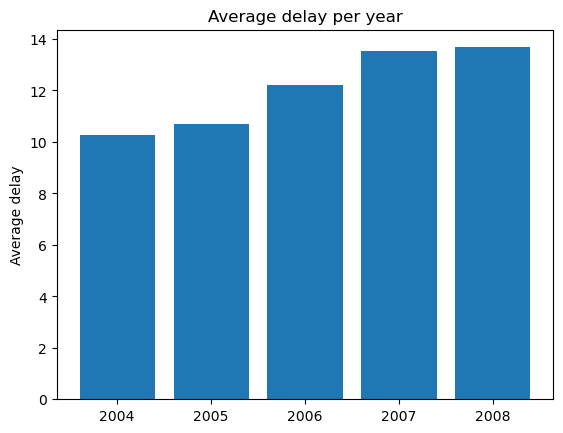

In [101]:
# making lists 
years = ['2004','2005','2006','2007','2008'] 

avgdelay_years = [
    df_2004['TDelay_04'].mean(),
    df_2005['TDelay_05'].mean(),
    df_2006['TDelay_06'].mean(),
    df_2007['TDelay_07'].mean(),
    df_2008['TDelay_08'].mean()
]

print(avgdelay_years)

plt.bar(years, avgdelay_years)
plt.ylabel("Average delay")
plt.title("Average delay per year")
# values included at the top

# **Best times to minimise delay**

In [12]:
# Understanding how many different flights are scheduled in a day 
# counting number of uniquely scheduled flight times
CRStimes_2004 = len(df_2004['CRSDepTime'].unique())
CRStimes_2005 = len(df_2005['CRSDepTime'].unique())
CRStimes_2006 = len(df_2006['CRSDepTime'].unique())
CRStimes_2007 = len(df_2007['CRSDepTime'].unique())
CRStimes_2008 = len(df_2008['CRSDepTime'].unique())

yearly_times_count = list((CRStimes_2004,CRStimes_2005,CRStimes_2006,CRStimes_2007,CRStimes_2008))

print(yearly_times_count)

[1182, 1185, 1179, 1188, 1158]


<Axes: xlabel='Time_segment', ylabel='TDelay_04'>

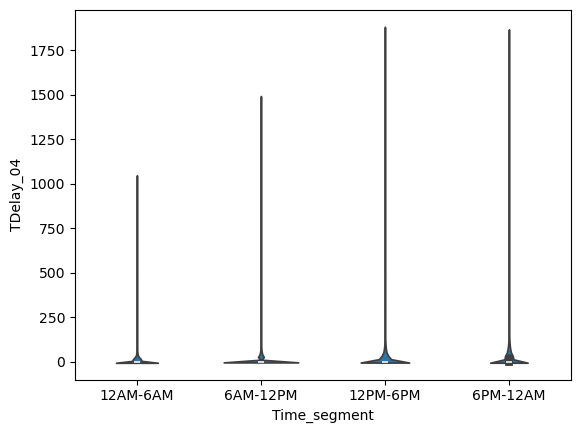

In [138]:
# visualisation - 4 segments 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

# 2004 
# data:
df_2004['CRSDepTime'] = df_2004['CRSDepTime'].dropna()

# creating intervals based on different dfs
df_emorning_04 = df_2004[(df_2004['CRSDepTime'] >= 0) & (df_2004['CRSDepTime'] <= 600)]
df_lmorning_04 = df_2004[(df_2004['CRSDepTime'] >= 600) & (df_2004['CRSDepTime'] <= 1200)]
df_aft_04 = df_2004[(df_2004['CRSDepTime'] >= 1200) & (df_2004['CRSDepTime'] <= 1800)]
df_night_04 = df_2004[(df_2004['CRSDepTime'] >= 1800) & (df_2004['CRSDepTime'] <= 2359)]

# adding new column - Time segment 
df_emorning_04 = df_emorning_04.copy()
df_emorning_04.loc[:, 'Time_segment'] = '12AM-6AM'

df_lmorning_04 = df_lmorning_04.copy()
df_lmorning_04.loc[:, 'Time_segment'] = '6AM-12PM' 

df_aft_04 = df_aft_04.copy()
df_aft_04.loc[:, 'Time_segment'] = '12PM-6PM'

df_night_04 = df_night_04.copy()
df_night_04.loc[:, 'Time_segment'] = '6PM-12AM'

combined_2004 = pd.concat([df_emorning_04, df_lmorning_04, df_aft_04, df_night_04])

# visualisation - 2004
sns.violinplot(data = combined_2004, y ='TDelay_04', x = 'Time_segment', width = 0.6)
#plt.title ('Delays throughout the day - 2004')
#plt.ylabel('Delay (min)')
#plt.xlabel('Segments of Day')
#plt.tight_layout()
#plt.show
#plt.savefig("Boxplot(times)_2004")

#sns.violinplot(data = combined_2004, inner ="quartile",scale="width")

In [83]:
# visualisation - 2005


In [83]:
# visualisation - 2006


In [83]:
# visualisation - 2007


In [83]:
# visualisation - 2008


## Average delay - In terms of scheduled departures

In [15]:
avg_timedelay_2004 = df_2004.groupby('CRSDepTime')['TDelay_04'].mean()
avg_timedelay_2005 = df_2005.groupby('CRSDepTime')['TDelay_05'].mean()
avg_timedelay_2006 = df_2006.groupby('CRSDepTime')['TDelay_06'].mean()
avg_timedelay_2007 = df_2007.groupby('CRSDepTime')['TDelay_07'].mean()
avg_timedelay_2008 = df_2008.groupby('CRSDepTime')['TDelay_08'].mean()

# long to wide
avg_timedelay_all = pd.concat([avg_timedelay_2004,avg_timedelay_2005,avg_timedelay_2006,avg_timedelay_2007,avg_timedelay_2008],axis = 1)
avg_timedelay_all.columns = ['2004','2005','2006','2007','2008']
avg_timedelay_all = avg_timedelay_all.dropna()
avg_timedelay_all.sort_values(by = '2004', ascending = True) 

#show all rows: temporary change 
with pd.option_context('display.max_rows', None):
    print(avg_timedelay_all)

                 2004       2005       2006       2007       2008
CRSDepTime                                                       
0            0.000000  35.000000   0.000000   0.000000   0.000000
1            0.000000   2.500000   4.500000  31.666667   0.000000
5            2.038627   6.520833   3.628571   6.614035   1.548387
10           8.663636  10.398810   3.936321   6.623377   6.202247
15           9.332248   7.511943   8.491036  17.383621   7.495868
20           9.852608  12.062284  11.534562   9.175633  14.340426
25           5.953467  11.983010   8.442623  10.934783   7.762136
30           7.386960   6.568462   9.628837   7.406414   7.469858
35          10.377622   9.588652   6.987362  13.493209   6.078488
40           3.940337   5.834040   7.095789   6.647458   9.741748
45           5.838448   6.104825   6.566343   6.653974   6.103093
50           5.518008   6.424723   8.877273   7.538084   8.022321
55           8.074860   8.208741  10.131773   9.890349   8.779497
100       

## Histogram 

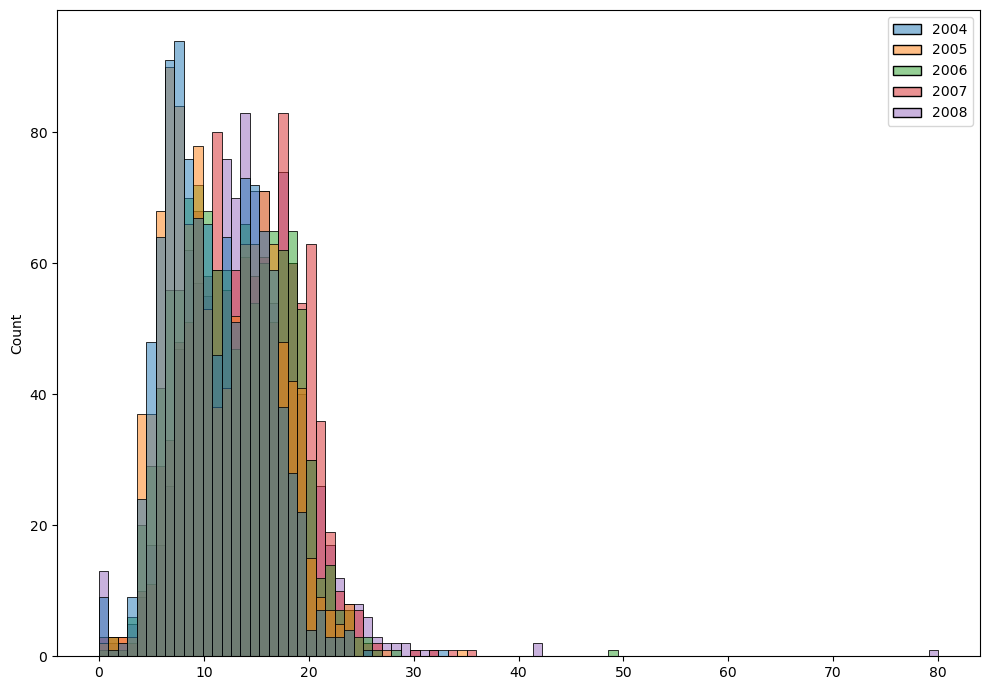

In [108]:
plt.figure(figsize=(10,7))
sns.histplot(data = avgtimedelay_all)
plt.tight_layout()

## violinplot 

<Axes: >

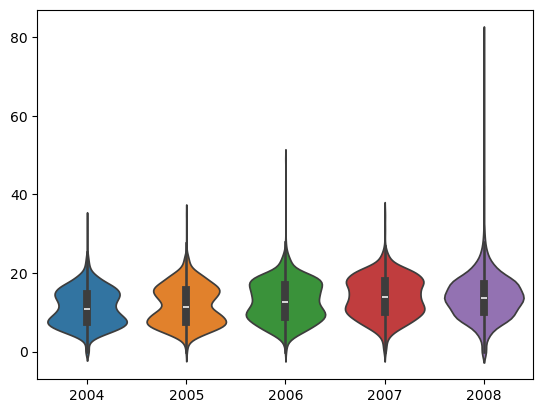

In [110]:
sns.violinplot(data = avgtimedelay_all) 

# **Best days to minimise delay**

## Average delay - In terms of days of the week

In [122]:
# using groupby and .mean(), pandas
avgdailydelay_2004 = df_2004.groupby('DayOfWeek', as_index = False)['TDelay_04'].mean().rename(columns={'TDelay_04' : 'Avg_Delay'})
avgdailydelay_2004['Year_'] = '2004' # Adding year columns for better clarity 

avgdailydelay_2005 = df_2005.groupby('DayOfWeek', as_index = False)['TDelay_05'].mean().rename(columns={'TDelay_05' : 'Avg_Delay'})
avgdailydelay_2005['Year_'] = '2005'

avgdailydelay_2006 = df_2006.groupby('DayOfWeek', as_index = False)['TDelay_06'].mean().rename(columns={'TDelay_06' : 'Avg_Delay'})
avgdailydelay_2006['Year_'] = '2006'

avgdailydelay_2007 = df_2007.groupby('DayOfWeek', as_index = False)['TDelay_07'].mean().rename(columns={'TDelay_07' : 'Avg_Delay'})
avgdailydelay_2007['Year_'] = '2007'

avgdailydelay_2008 = df_2008.groupby('DayOfWeek', as_index = False)['TDelay_08'].mean().rename(columns={'TDelay_08' : 'Avg_Delay'})
avgdailydelay_2008['Year_'] = '2008'

# combining through concatenation in pandas
avgdailydelay_all = pd.concat([avgdailydelay_2004, avgdailydelay_2005, avgdailydelay_2006, 
                                avgdailydelay_2007, avgdailydelay_2008], ignore_index = True)
#show all rows: temporary change 
with pd.option_context('display.max_rows', None):
    print(avgdailydelay_all)
                                  

    DayOfWeek  Avg_Delay Year_
0           1  11.282899  2004
1           2   9.518823  2004
2           3  10.472885  2004
3           4  11.142146  2004
4           5  11.045828  2004
5           6   7.603489  2004
6           7  10.311342  2004
7           1  11.274660  2005
8           2   9.258978  2005
9           3  11.022873  2005
10          4  12.419328  2005
11          5  12.253825  2005
12          6   8.105424  2005
13          7  10.299545  2005
14          1  12.320694  2006
15          2  10.256875  2006
16          3  11.559660  2006
17          4  14.348016  2006
18          5  14.877378  2006
19          6   9.754102  2006
20          7  11.911777  2006
21          1  13.770635  2007
22          2  12.034092  2007
23          3  13.290748  2007
24          4  15.388139  2007
25          5  15.564108  2007
26          6  10.437846  2007
27          7  13.818538  2007
28          1  14.019268  2008
29          2  14.080227  2008
30          3  11.546209  2008
31      

## barplot 

Text(0.5, 0, 'Days (1 = Mon, 7 = Sun)')

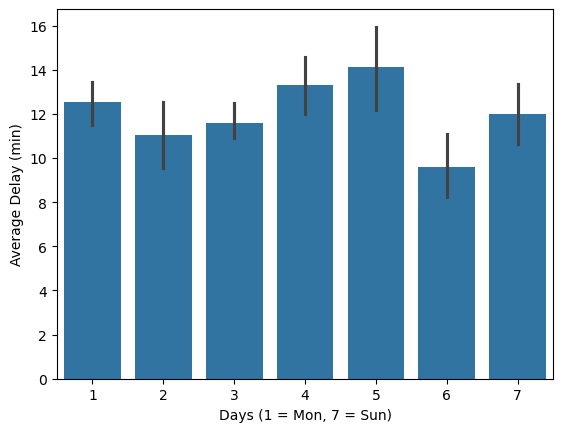

In [130]:
sns.barplot(data = avgdailydelay_all, x = 'DayOfWeek', y = 'Avg_Delay')
plt.ylabel('Average Delay (min)')
plt.xlabel('Days (1 = Mon, 7 = Sun)')

## Spread of data by each day

AttributeError: PolyCollection.set() got an unexpected keyword argument 'boxprops'

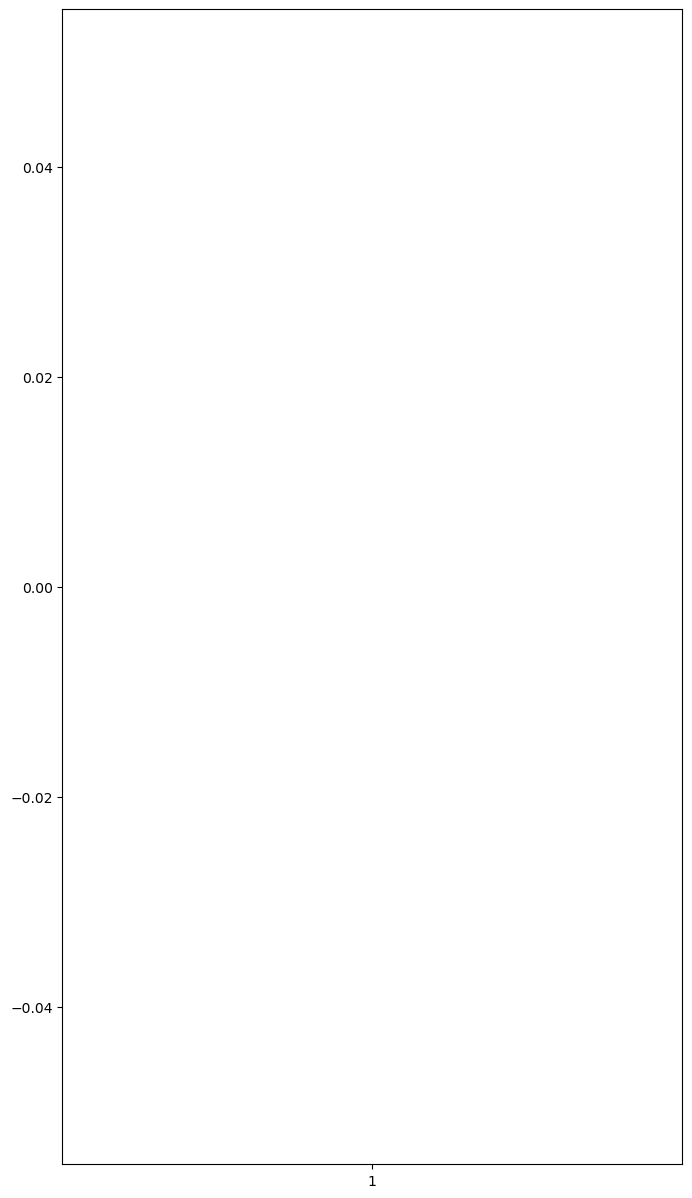

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize = (8, 15))
sns.violinplot(data = df_2004, x = 'DayOfWeek', y = 'TDelay_04', width = 1, boxprops = dict(alpha=0.6), dodge = True)
plt.title ('Delays throughout the week - 2004')
plt.ylabel('Delay (min)')
plt.xlabel('Days (1 = Mon, 7 = Sun)')
plt.legend()
#plt.savefig("Boxplot(days)_2004")